In [1]:
# Step 1 : Input data

In [2]:
users = [
	{ "id": 0, "name": "Hero" },
	{ "id": 1, "name": "Dunn" },
	{ "id": 2, "name": "Sue" },
	{ "id": 3, "name": "Chi" },
	{ "id": 4, "name": "Thor" },
	{ "id": 5, "name": "Clive" },
	{ "id": 6, "name": "Hicks" },
	{ "id": 7, "name": "Devin" },
	{ "id": 8, "name": "Kate" },
	{ "id": 9, "name": "Klein" }
]
users

[{'id': 0, 'name': 'Hero'},
 {'id': 1, 'name': 'Dunn'},
 {'id': 2, 'name': 'Sue'},
 {'id': 3, 'name': 'Chi'},
 {'id': 4, 'name': 'Thor'},
 {'id': 5, 'name': 'Clive'},
 {'id': 6, 'name': 'Hicks'},
 {'id': 7, 'name': 'Devin'},
 {'id': 8, 'name': 'Kate'},
 {'id': 9, 'name': 'Klein'}]

In [3]:
friendships = [
	(0,1), (0,2),
	(1,2), (1,3),
	(2,3),
	(3,4),
	(4,5),
	(5,6), (5,7),
	(6,8),
	(7,8),
	(8,9)
]
friendships

[(0, 1),
 (0, 2),
 (1, 2),
 (1, 3),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (5, 7),
 (6, 8),
 (7, 8),
 (8, 9)]

In [4]:
for user in users:
    user["friends"] =  []
users

[{'friends': [], 'id': 0, 'name': 'Hero'},
 {'friends': [], 'id': 1, 'name': 'Dunn'},
 {'friends': [], 'id': 2, 'name': 'Sue'},
 {'friends': [], 'id': 3, 'name': 'Chi'},
 {'friends': [], 'id': 4, 'name': 'Thor'},
 {'friends': [], 'id': 5, 'name': 'Clive'},
 {'friends': [], 'id': 6, 'name': 'Hicks'},
 {'friends': [], 'id': 7, 'name': 'Devin'},
 {'friends': [], 'id': 8, 'name': 'Kate'},
 {'friends': [], 'id': 9, 'name': 'Klein'}]

In [5]:
for i,j in friendships:
    users[i]["friends"].append(users[j]["id"])
    users[j]["friends"].append(users[i]["id"])
users

[{'friends': [1, 2], 'id': 0, 'name': 'Hero'},
 {'friends': [0, 2, 3], 'id': 1, 'name': 'Dunn'},
 {'friends': [0, 1, 3], 'id': 2, 'name': 'Sue'},
 {'friends': [1, 2, 4], 'id': 3, 'name': 'Chi'},
 {'friends': [3, 5], 'id': 4, 'name': 'Thor'},
 {'friends': [4, 6, 7], 'id': 5, 'name': 'Clive'},
 {'friends': [5, 8], 'id': 6, 'name': 'Hicks'},
 {'friends': [5, 8], 'id': 7, 'name': 'Devin'},
 {'friends': [6, 7, 9], 'id': 8, 'name': 'Kate'},
 {'friends': [8], 'id': 9, 'name': 'Klein'}]

In [6]:
for user in users:
    print(user["id"],user["friends"])

(0, [1, 2])
(1, [0, 2, 3])
(2, [0, 1, 3])
(3, [1, 2, 4])
(4, [3, 5])
(5, [4, 6, 7])
(6, [5, 8])
(7, [5, 8])
(8, [6, 7, 9])
(9, [8])


In [7]:
def number_of_friends(user):
    return len(user["friends"])

In [8]:
# Step 2 : Explain data (number of user's friends)

In [9]:
# Step 2-1 : If small data, then show the data itself 

In [10]:
for user in users:
    print (user["id"], number_of_friends(user))

(0, 2)
(1, 3)
(2, 3)
(3, 3)
(4, 2)
(5, 3)
(6, 2)
(7, 2)
(8, 3)
(9, 1)


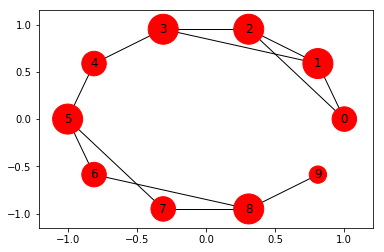

In [11]:
import networkx as nx
from matplotlib import pyplot as plt
g = nx.Graph()
for i,j in friendships:
    g.add_edge(i, j)
%matplotlib inline
#pos = nx.circular_layout(g)
#pos = nx.random_layout(g)
pos = nx.shell_layout(g)
#pos = nx.spring_layout(g)
#pos = nx.spectral_layout(g)
#pos = nx.fruchterman_reingold_layout(g)
degree = nx.degree(g)
nx.draw_networkx(g, pos, node_size=[v*300 for v in degree.values()])
plt.figure(figsize=(10, 3))
#nx.draw(g)
plt.show()

In [12]:
# Step 2-2 : If big data, then find and show important information of the data by using statistics

In [13]:
# Step 2-2-1 Histogram

In [14]:
num_friends = [number_of_friends(user) for user in users]
num_friends

[2, 3, 3, 3, 2, 3, 2, 2, 3, 1]

In [15]:
from collections import Counter
friend_counts = Counter(num_friends)
friend_counts

Counter({1: 1, 2: 4, 3: 5})

In [16]:
# plot
xs = range(1,len(friend_counts)+1)
xs

[1, 2, 3]

In [17]:
ys = [friend_counts[x] for x in xs]
ys

[1, 4, 5]

In [18]:
max(xs) + 1

4

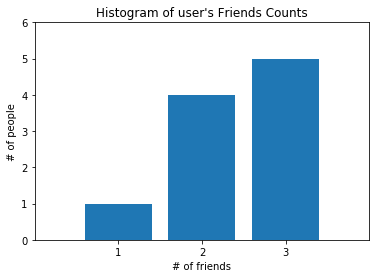

In [19]:
from matplotlib import pyplot as plt
plt.bar(xs, ys)
plt.axis([0, max(xs)+1 , 0, max(ys)+1])
plt.xticks(xs)
plt.title("Histogram of user's Friends Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [20]:
# Step 2-2-2 : total, min, max, sort

In [21]:
total_number_of_users = len(num_friends)
total_number_of_users

10

In [22]:
max_number_of_friends = max(num_friends)
max_number_of_friends

3

In [23]:
min_number_of_friends = min(num_friends)
min_number_of_friends

1

In [24]:
sorted_num_friends = sorted(num_friends)
sorted_num_friends

[1, 2, 2, 2, 2, 3, 3, 3, 3, 3]